In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [2]:
df = pd.read_csv("C:/Users/Haziel/Documents/Tec/Taller de Investigacion 2/Smart Gloves/Codigo/sensores.csv")

In [3]:
# Muestro el dataset con los datos crudos arrojados por el sensor
df.head(10)

,ax,ay,az,gx,gy,gz,d1,d2,d3,d4,target
0,3427,-1924,15855,669,756,-1437,456.0,434.0,596.0,618.0,0
1,3475,-1936,15947,649,548,-1391,456.0,442.0,596.0,611.0,0
2,3623,-1852,15851,747,293,-1302,451.0,421.0,603.0,611.0,0
3,3751,-1644,15911,702,-65,-1079,451.0,438.0,596.0,603.0,0
4,3879,-1368,15771,618,-162,-873,456.0,430.0,596.0,618.0,0
5,3871,-1496,15527,655,-303,-675,456.0,438.0,603.0,611.0,0
6,3991,-1264,15663,594,-295,-395,451.0,442.0,596.0,611.0,0
7,3811,-1416,15551,708,-174,-122,461.0,421.0,596.0,611.0,0
8,3787,-1280,15483,651,-22,130,447.0,405.0,603.0,611.0,0
9,3483,-1220,15547,676,185,347,456.0,425.0,603.0,611.0,0


In [4]:
df.shape

(3492, 11)

In [5]:
df_a = df[df["target"] == 0]
df_b = df[df["target"] == 1]
df_c = df[df["target"] == 2]
df_i = df[df["target"] == 3]

In [6]:
# Creo un arreglo con los datos normalizados
features = ['ax', 'ay', 'az', 'gx', 'gy', 'gz', 'd1']
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)
x

array([[-4.67932287,  0.92516368,  3.65515643, ...,  0.78400095,
        -1.09843215,  1.10578125],
       [-4.65501225,  0.91869801,  3.70662058, ...,  0.61625512,
        -1.05667846,  1.10578125],
       [-4.5800545 ,  0.96395771,  3.65291886, ...,  0.41060518,
        -0.97589416,  1.06643306],
       ...,
       [-0.74707993, -0.93048385,  0.56506957, ...,  0.22672994,
        -0.12175897,  0.9956063 ],
       [-0.53031023, -0.96496743,  0.60982101, ...,  0.3775399 ,
        -0.34232736,  0.96412774],
       [-0.33177349, -0.97789877,  0.58297015, ...,  0.42996047,
        -0.58195721,  0.96412774]])

In [7]:
# Actualizo mi dataframe con los datos normalizados
df = pd.DataFrame(data = x, columns = features)
df.head()

,ax,ay,az,gx,gy,gz,d1
0,-4.679323,0.925164,3.655156,0.354970,0.784001,-1.098432,1.105781
1,-4.655012,0.918698,3.706621,0.337521,0.616255,-1.056678,1.105781
2,-4.580054,0.963958,3.652919,0.423018,0.410605,-0.975894,1.066433
3,-4.515226,1.076029,3.686482,0.383759,0.121889,-0.773480,1.066433
4,-4.450398,1.224740,3.608167,0.310476,0.043661,-0.586496,1.105781


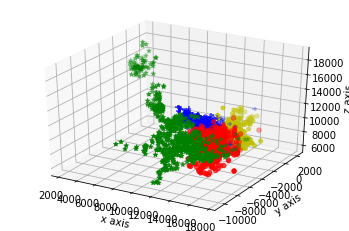

In [8]:
# MUESTRO EN 3D LA POSICION DE CADA UNO DE LOS PUNTOS EN AX, AY, AZ
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

ax1.scatter(df_a["ax"], df_a["ay"], df_a["az"], c='g', marker='*')
ax1.scatter(df_b["ax"], df_b["ay"], df_b["az"], c='r', marker='o')
ax1.scatter(df_c["ax"], df_c["ay"], df_c["az"], c='b', marker='+')
ax1.scatter(df_i["ax"], df_i["ay"], df_i["az"], c='y', marker='p')

ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
ax1.set_zlabel('z axis')

plt.show()

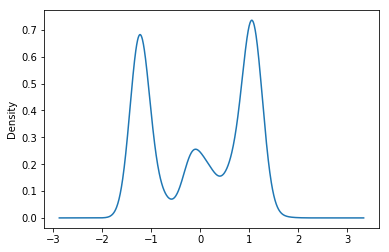

In [9]:
df["d1"].plot(kind='kde')

## PCA Projection to 2D
#### (Análisis de componentes principales)

In [10]:
pca = PCA(n_components=2)

In [11]:
principalComponents = pca.fit_transform(x)

In [12]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [13]:
principalDf.head(5)

,principal component 1,principal component 2
0,4.918778,-1.351865
1,4.958001,-1.453953
2,4.869584,-1.578883
3,4.856520,-1.854327
4,4.763665,-2.002451


In [14]:
principalDf.shape

(3492, 2)

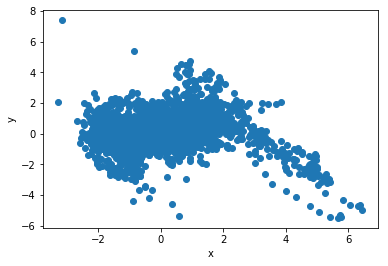

In [15]:
plt.scatter(principalDf["principal component 1"], principalDf["principal component 2"])
plt.xlabel('x')
plt.ylabel('y')
plt.show()